1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:
1.	Which are the teams which started playing between 1930-1980?
2.	Which are the top 5 teams in terms of points?
3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)
4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, mannwhitneyu
from scipy.stats import ttest_ind

In [18]:
laliga = pd.read_csv('C:/Users/Karangula/LaLiga.csv')
laliga.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [19]:
laliga.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [20]:
laliga.columns = laliga.loc[0,:]
laliga.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'Since/LastApp', 'BestPosition'],
      dtype='object', name=0)

In [21]:
laliga.columns = ['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runnerup', 'Third', 'Fourth', 'Fifth', 'Sixth', 'T', 'Debut',
       'SinceLastApp', 'BestPosition']

# we have renamed the columns of laliga frame

In [22]:
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [23]:
laliga.drop(index=0, inplace=True)

# we have dropped the first row of the dataframe, unwanted data 

In [24]:
laliga.shape

(61, 20)

In [25]:
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [26]:
laliga.isna().sum()

# no null records were found

Pos             0
Team            0
Seasons         0
Points          0
GamesPlayed     0
GamesWon        0
GamesDrawn      0
GamesLost       0
GoalsFor        0
GoalsAgainst    0
Champion        0
Runnerup        0
Third           0
Fourth          0
Fifth           0
Sixth           0
T               0
Debut           0
SinceLastApp    0
BestPosition    0
dtype: int64

In [27]:
laliga[laliga.duplicated()]

# no duplicate records were found

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition


In [28]:
laliga.index = laliga['Team']

# we assign the index of laliga dataframe to be the Pos

In [29]:
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
Team,,,,,,,,,,,,,,,,,,,,
Real Madrid,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
Barcelona,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
Atletico Madrid,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
Valencia,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
Athletic Bilbao,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [30]:
laliga.drop(columns = ['Pos', 'Team'], inplace=True)

# we are dropping the Pos column as it is unnecessary column. We also drop Team column as we have already assigned it as Index.
# One can aso assign Pos as index, according ti their convinience.

In [31]:
laliga.head()

,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
Team,,,,,,,,,,,,,,,,,,
Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [32]:
laliga.dtypes

# ALl the columns are of type 'object'. We need to change them to numeric.

Seasons         object
Points          object
GamesPlayed     object
GamesWon        object
GamesDrawn      object
GamesLost       object
GoalsFor        object
GoalsAgainst    object
Champion        object
Runnerup        object
Third           object
Fourth          object
Fifth           object
Sixth           object
T               object
Debut           object
SinceLastApp    object
BestPosition    object
dtype: object

In [33]:
# refine the data in the columns, Debut and SinceLastApp

In [34]:
laliga['Debut'].values

# we consider the absolute lower year as the Debut year. Same logic applies to SinceLastApp column too.

array(['1929', '1929', '1929', '1931-32', '1929', '1934-35', '1929',
       '1929', '1939-40', '1932-33', '1941-42', '1939-40', '1948-49',
       '1929', '1944-45', '1935-36', '1949-50', '1933-34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004-05',
       '1935-36', '1961-62', '1940-41', '1930-31', '1963-64', '1974-75',
       '1943-44', '1977-78', '1987-88', '1941-42', '1991-92', '2007-08',
       '1962-63', '1994-95', '1978-79', '1971-72', '1963-64', '1999-00',
       '2014-15', '1929', '1990-91', '1947-48', '1996-97', '1995-96',
       '1945-46', '1953-54', '1929', '1979-80', '1929', '1950-51',
       '2016-17', '2009-10', '1956-57', '1951-52', '1955-56', '2017-18'],
      dtype=object)

In [35]:
l = len(laliga['Debut'])
#print(l)
for i in range(l):
    laliga['Debut'][i] = laliga['Debut'][i][:4]
    laliga['SinceLastApp'][i] = laliga['SinceLastApp'][i][:4]

In [36]:
laliga['SinceLastApp'].values

array(['1929', '1929', '2002', '1987', '1929', '2001', '1994', '2010',
       '2012', '2015', '2014', '2012', '2013', '2011', '2015', '2016',
       '2008', '2000', '2012', '2015', '2013', '2016', '2015', '2014',
       '2015', '2010', '2009', '2007', '2016', '2015', '1998', '1987',
       '2005', '1996', '1990', '2004', '2014', '2014', '1997', '2008',
       '1979', '1969', '2008', '2014', '1934', '1992', '2006', '1998',
       '1997', '1950', '1957', '1931', '1980', '1930', '1993', '2016',
       '2009', '1956', '1951', '1955', '2017'], dtype=object)

In [37]:
laliga.tail()

# we have refined our data in Debut and SinceLastApp columns. We also have -  as data in many places. 
# So we are going to replacing it with numeircal zero

,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
Team,,,,,,,,,,,,,,,,,,
Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,-,2009,2009,20
Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,-,1956,1956,16
Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,-,1951,1951,16
Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,-,1955,1955,15
Girona,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2017,2017,9


In [38]:
laliga.replace('-', 0, inplace=True)

In [39]:
laliga.tail()

,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
Team,,,,,,,,,,,,,,,,,,
Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,0,2009,2009,20
Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,0,1956,1956,16
Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,0,1951,1951,16
Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,0,1955,1955,15
Girona,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,2017,9


In [40]:
# change the datatype  to integer from strings

In [41]:
laliga = laliga.astype(int)

In [42]:
laliga.dtypes

Seasons         int32
Points          int32
GamesPlayed     int32
GamesWon        int32
GamesDrawn      int32
GamesLost       int32
GoalsFor        int32
GoalsAgainst    int32
Champion        int32
Runnerup        int32
Third           int32
Fourth          int32
Fifth           int32
Sixth           int32
T               int32
Debut           int32
SinceLastApp    int32
BestPosition    int32
dtype: object

1.  Which are the teams which started playing between 1930-1980?

In [43]:
Team_started_playing_between_1930_1980 = pd.Series(laliga[(laliga['Debut'] >= 1930) & (laliga['Debut'] <= 1980)].sort_values(by = 'Debut').index)

print(Team_started_playing_between_1930_1980)

0                  Alaves
1                Valencia
2              Real Betis
3                  Oviedo
4                 Sevilla
5                Hercules
6                 Osasuna
7                Zaragoza
8              Celta Vigo
9                  Murcia
10                Granada
11    Deportivo La Coruna
12              Castellon
13               Sabadell
14         Sporting Gijon
15               Alcoyano
16              Gimnastic
17             Valladolid
18                 Malaga
19                 Lleida
20             Las Palmas
21        Atletico Tetuan
22                   Jaen
23       Cultural Leonesa
24                 Condal
25                  Elche
26               Mallorca
27               Tenerife
28                Cordoba
29                Levante
30             Pontevedra
31              Burgos CF
32              Salamanca
33         Rayo Vallecano
34                  Cadiz
35             Recreativo
36             AD Almeria
Name: Team, dtype: object


Above is the list of teams that have started playing between 1930 and 1980. We have arranged the name in the ascending order of their Debut, that is, oldest team first.

2. Which are the top 5 teams in terms of points?

In [44]:
laliga.head()

,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition
Team,,,,,,,,,,,,,,,,,,
Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [45]:
laliga.sort_values(by = 'Points', ascending=False)[:5]['Points']

Team
Real Madrid        4385
Barcelona          4262
Atletico Madrid    3442
Valencia           3386
Athletic Bilbao    3368
Name: Points, dtype: int32

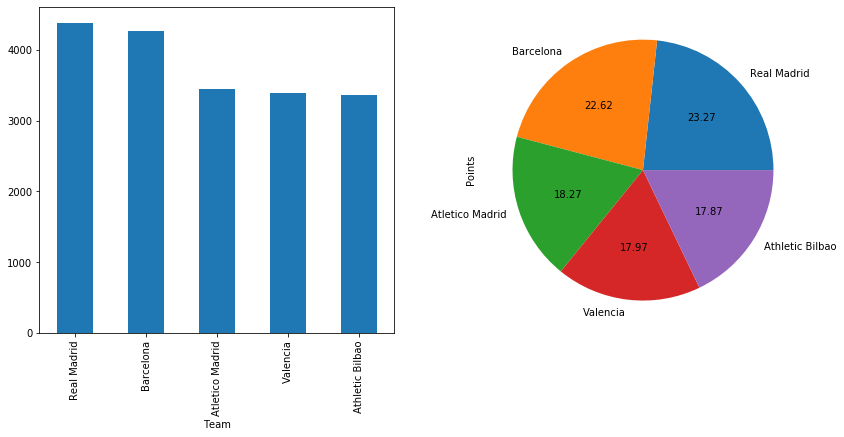

In [62]:
fig_2, axes = plt.subplots(1,2, figsize=(14,6))
laliga.sort_values(by = 'Points', ascending=False)[:5]['Points'].plot(kind='bar', ax = axes[0])
laliga.sort_values(by = 'Points', ascending=False)[:5]['Points'].plot(kind='pie', autopct='%.2f', ax = axes[1])
plt.show()

Real Madrid is the top team with highest points of 4385 tailed by Barcelona, Atletico Madrid, Valencia and Athelic Bilbao joining the top 5 teams wrt to points earned. 

3. What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [63]:
laliga['WinningPercentage'] = (laliga['GamesWon']/laliga['GamesPlayed'])*100

In [64]:
laliga.head()

,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runnerup,Third,Fourth,Fifth,Sixth,T,Debut,SinceLastApp,BestPosition,WinningPercentage
Team,,,,,,,,,,,,,,,,,,,
Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1,59.630702
Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1,57.241130
Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1,47.475134
Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1,44.557057
Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1,43.772629


In [65]:
laliga.sort_values(by= 'WinningPercentage', ascending=False)['WinningPercentage'][:5]

Team
Real Madrid        59.630702
Barcelona          57.241130
Atletico Madrid    47.475134
Valencia           44.557057
Athletic Bilbao    43.772629
Name: WinningPercentage, dtype: float64

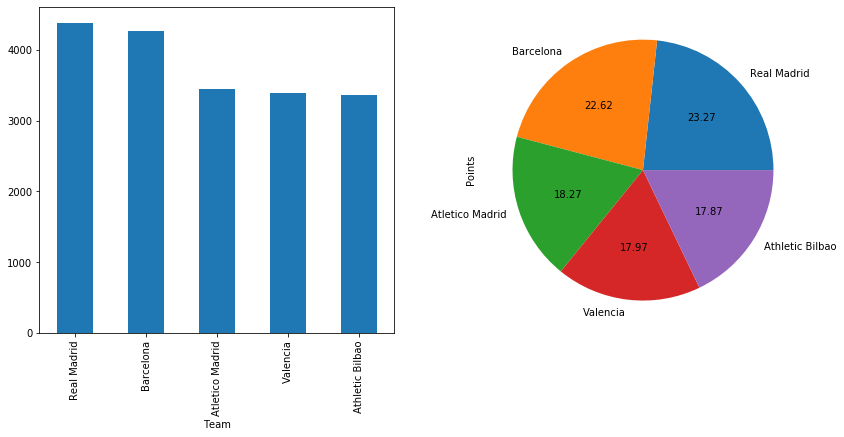

In [66]:
fig_3, axes = plt.subplots(1,2, figsize=(14,6))
laliga.sort_values(by = 'Points', ascending=False)[:5]['Points'].plot(kind='bar', ax = axes[0])
laliga.sort_values(by = 'Points', ascending=False)[:5]['Points'].plot(kind='pie', autopct='%.2f', ax = axes[1])
plt.show()

These are the top 5 teams with the highest winning percentage.

4. Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [67]:
winning_percentage_till_7 = laliga[(laliga['BestPosition']>=4) & (laliga['BestPosition']<=7)]['WinningPercentage']
winning_percentage_till_7

Team
Celta Vigo    34.511190
Valladolid    31.582538
Osasuna       32.321700
Malaga        31.075697
Granada       29.380054
Elche         29.941003
Getafe        32.236842
Hercules      29.299363
Tenerife      31.376518
Alaves        32.894737
Levante       28.109453
Salamanca     29.078014
Sabadell      30.281690
Logrones      27.745665
Castellon     30.838323
Albacete      28.148148
Cordoba       29.078014
Pontevedra    29.444444
Gimnastic     29.310345
Real Union    29.166667
Name: WinningPercentage, dtype: float64

In [68]:
winning_percentage_till_3 = laliga[(laliga['BestPosition']>=1) & (laliga['BestPosition']<=3)]['WinningPercentage']
winning_percentage_till_3

Team
Real Madrid            59.630702
Barcelona              57.241130
Atletico Madrid        47.475134
Valencia               44.557057
Athletic Bilbao        43.772629
Sevilla                41.112957
Espanyol               36.100533
Real Sociedad          37.532580
Zaragoza               35.146022
Real Betis             35.069444
Deportivo La Coruna    36.797386
Racing Santander       31.722689
Sporting Gijon         32.304527
Oviedo                 34.228188
Mallorca               33.704453
Las Palmas             33.485401
Villarreal             41.176471
Arenas                 33.076923
Name: WinningPercentage, dtype: float64

Our hypothesis statement says that,

Ho : There is no significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

Ha : There is significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [69]:
shapiro(winning_percentage_till_7)

(0.9436671733856201, 0.2809881269931793)

In [70]:
shapiro(winning_percentage_till_3)

(0.8252524733543396, 0.003532945876941085)

Shapiro test confirms that one of the group isn't NORMAL, so we go for, independent unpaired two sample test of mean, mannwhitneyu

In [71]:
mannwhitneyu(winning_percentage_till_7, winning_percentage_till_3)

MannwhitneyuResult(statistic=11.0, pvalue=4.1876636593687686e-07)

It is observed that the p_value is less than 0.05, which means that, it rejects the NULL hypothesis. SO we can conclude that there is significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

POST- HOC ANALYSIS

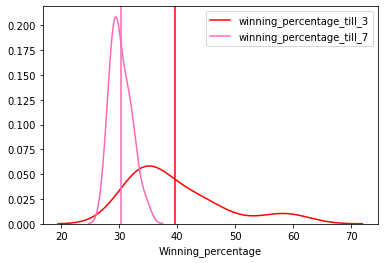

In [72]:
sns.kdeplot(winning_percentage_till_3, color='red', label='winning_percentage_till_3')
plt.axvline(np.mean(winning_percentage_till_3), color='red')
sns.kdeplot(winning_percentage_till_7, color='hotpink', label='winning_percentage_till_7')
plt.axvline(np.mean(winning_percentage_till_7), color='hotpink')
plt.xlabel('Winning_percentage')
plt.legend()
plt.show()

It is very evident from the post - hoc analysis that there is a isgnificant diffeence between in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?
b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.
c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?
d)	Which of the two above intervals are wider?
e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.


In [73]:
n = 200
x_bar = 140
sigma = 25

a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [74]:
standard_error = sigma/(np.sqrt(n))
print('The standard error of the sample mean is',standard_error, 'Hg per person')

The standard error of the sample mean is 1.7677669529663687 Hg per person


The standard error is a statistical term that measures the accuracy with which a sample distribution represents a population by using standard deviation. In statistics, a sample mean deviates from the actual mean of a population—this deviation is the standard error of the mean.

The sample mean deviates from the actual mean by 1.768 units.

 b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [75]:
print('The 95% CI for the true mean blood pressure for all 60 year old women with glaucoma is')
print()
print(x_bar - (1.96 * standard_error),',', x_bar + (1.96 * standard_error))

The 95% CI for the true mean blood pressure for all 60 year old women with glaucoma is

136.5351767721859 , 143.4648232278141


c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [76]:
n_new =100
x_bar = 140
sigma = 25

In [77]:
standard_error_new = sigma/(np.sqrt(n_new))
standard_error_new

2.5

In [78]:
# for 95% CI of true mean

In [79]:
print('The 95% CI for the true mean blood pressure for sample of 100 women for all 60 year old women with glaucoma is')
print()
print(x_bar - (1.96 * standard_error_new),',', x_bar + (1.96 * standard_error_new))

The 95% CI for the true mean blood pressure for sample of 100 women for all 60 year old women with glaucoma is

135.1 , 144.9


d) Which of the two above intervals are wider

From the above calculations we found that for percentage of confidence interval, the interval has got larger for lesser number of samples, compared to the greater number of samples.

In other words, we can also say that, as the number of sample increases for same percentage of confidence interval, the interval will decrease, and vice-versa.

e) Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

In layman terms, we can correlate from confidence interval and the standard error as follows.

We all know that, standard error is a measure of deviation from the sample mean of sample distributions of a population. So as the sample size increases, we get more samples from the population which represents it so good. If the sample size is less, then we may or may not get sample with good population representation.

Hence with increase in the sample size, we get good population representaion samples and can easily get closer to our sample mean. Which alternatley, decreases the deviation from the sample mean (standard error).

3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.

1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?


In [80]:
golf = pd.read_csv('C:/Users/Karangula/Golf.csv')
golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [81]:
golf.shape

(40, 2)

We have a total of 40 records of Current golf ball driving distance and New golf driving distance in yards.

1. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

We formulate our hypothesis as,

Ho : The mean driving distance of the current golf ball is equal to the mean driving distance of the new golf balls.

Ha : The mean driving distance of the current golf ball is not equal to the mean driving distance of the new golf balls.

we perform two sample t test to compare the mean of these two ball groups

Before that we perform test of normality, to check for the normality of the the two groups of data.

In [82]:
shapiro(golf['Current'])

(0.9707046747207642, 0.378787100315094)

In [83]:
shapiro(golf['New'])

(0.9678263664245605, 0.3064655363559723)

both the groups have p_val > 0.05, which means that they both are NORMAL (normally distributed). Hence we go for independent parametric two sample t test using ttest_ind()...

2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [84]:
tstat, pval = ttest_ind(golf['Current'], golf['New'])

In [85]:
print('The test_statistics is', tstat,' and the p_value for the test is',pval)

The test_statistics is 1.3283615935245678  and the p_value for the test is 0.18793228491854663


It is observed that the p_value for the test is greater than 0.05, hence we accept our NULL hypothesis.

# POST - HOC analysis

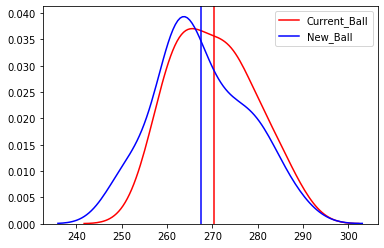

In [52]:
sns.kdeplot(golf['Current'], color='Red', label = 'Current_Ball')
plt.axvline(np.mean(golf['Current']), color='Red')
sns.kdeplot(golf['New'], color='Blue', label = 'New_Ball')
plt.axvline(np.mean(golf['New']), color='Blue')
plt.legend()
plt.show()

It is evident from the analysis that the mean driving distance of the current golf ball is very close to the mean driving distance of the new golf balls.

3. What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population

In [86]:
mean_new_ball = np.mean(golf['New'])
mean_current_ball = np.mean(golf['Current'])

In [87]:
mean_new_ball, mean_current_ball

(267.5, 270.275)

In [88]:
std_new_ball = np.std(golf['New'])
std_current_ball = np.std(golf['Current'])

std_new_ball, std_current_ball

(9.772410142846033, 8.642880017679293)

In [89]:
# 95% CI for New ball
print('95% CI for New ball')
print()
print((mean_new_ball - 1.96 * std_new_ball, mean_new_ball + 1.96 * std_new_ball))

95% CI for New ball

(248.3460761200218, 286.6539238799782)


In [90]:
# 95% CI for Current ball
print('95% CI for Current ball')
print()
print((mean_current_ball - 1.96 * std_current_ball, mean_current_ball + 1.96 * std_current_ball))

95% CI for Current ball

(253.33495516534856, 287.2150448346514)


In [91]:
# what is the 95% confidence interval for the difference between the means of the two population

In [92]:
lower_limit = (mean_new_ball - mean_current_ball) - (1.96 * ((std_new_ball)**2 / len(golf['New']) + (std_current_ball)**2 / len(golf['Current'])))

lower_limit

-11.114769374999977

In [93]:
upper_limit = (mean_new_ball - mean_current_ball) + (1.96 * ((std_new_ball)**2 / len(golf['New']) + (std_current_ball)**2 / len(golf['Current'])))
upper_limit

5.564769375000022

In [94]:
print('95% confidence interval for the difference between the means of the two population')
print()
print((lower_limit, upper_limit))

95% confidence interval for the difference between the means of the two population

(-11.114769374999977, 5.564769375000022)
